## Desafio 2

O segundo desafio para a solução do problema de uma mistura binária líquida de combustíveis, para aplicar em uma usina elétrica a vapor que funciona pelo Ciclo de Rankine, consiste em:

- A separação dos líquidos na mistura e a evaporação do combustível.

Aspectos importantes a serem considerados:

- O volume final da mistura calculado a partir dos volumes parciais molares.

- O comportamento da mistura de líquido (ideal ou não ideal)

- As características do diagrama de fases da mistura líquida.

- A pressão de vapor dos compostos



### Misturas

As misturas entre substâncias são algo bastante comum na natureza. As misturas podem ser homogêneas ou heterogêneas, sendo que a diferença entre elas consiste na primeira possuir aspecto físico uniforme e constituir uma única fase termodinâmica, enquanto a segunda é formada por um agregado de fases termodinâmicas em coexistência, conforme OLIVEIRA(2012).

Além dessa classificação, as misturas podem ser categorizadas como ideais ou reais, a depender do comportamento termodinâmico de seus componentes. Uma mistura ideal é uma mistura de dois ou mais componentes que segue as leis da termodinâmica sem desvios significativos. Nesse tipo de mistura, as interações entre as moléculas dos componentes são consideradas idênticas às interações entre moléculas do mesmo componente, o que significa que a energia livre de Gibbs da mistura pode ser calculada a partir das frações molares dos componentes e das suas respectivas energias livres de Gibbs em estado puro, utilizando-se a equação de mistura de Gibbs-Duhem. Enquanto as misturas reais apresentam grandes desvios das leis da termodinâmica, o que afeta a operação dos processos envolvendo as misturas, como a sua destilação.

A separação dos componentes de uma mistura, para obter substâncias com certa pureza, pode ocorrer pela destilação em que o processo de separação dos líquidos envolve a evaporação dos composotos e a condensação do vapor em um sistema fechado.

A energia livre de Gibbs é útil no estudo de misturas e permite identificar propriedades como a coexistência de fase e misturas miscíveis, ou seja, aquelas que não têm preferência de vizinhos, apresentando um comportamento de curva do diagrama de concentração dos compostos pela energia. Sendo assim, são misturas mais homogêneas.

Quando duas fases coexistem, por exemplo estado líquido e estado de vapor, há o equilíbrio termodinâmico. Existe mais de uma coexistência de fases durante o processo de transição entre os estados dos compostos, e esse comportamento será visto ao longo deste notebook.

In [1]:
# Importações

from lmfit.models import LinearModel
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
from scipy.optimize import fsolve
from sklearn import linear_model
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import interp1d

Dados sobre temperatura e fração molar dos compostos tolueno e ciclohexano obtidos por meio do site *Vapor-Liquid Equilibrium Calculator*:

In [2]:
dados = pd.read_csv('Dados temperatura Tolueno e Ciclohexano.txt', sep = ',', engine='python', header=0)
dados.head()

,Temperature,x1,y1
0,°C,mol fract.,NaN
1,80.7746,0,0.000000
2,80.7936,0.001,0.000523
3,80.7746,0,0.000000
4,80.7936,0.001,0.000523


In [3]:
temperatura = dados.iloc[1:46, 0].astype(float)
fracao_molar_tolueno = dados.iloc[1:46, 1].astype(float)
fracao_molar_ciclohexano = dados.iloc[1:46, 2].astype(float)

Diagrama de fases dos compostos em relação à temperatura (°C):

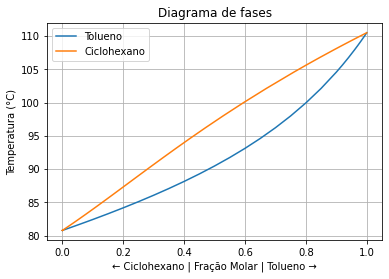

In [4]:
plt.plot(fracao_molar_tolueno, temperatura, label='Tolueno')
plt.plot(fracao_molar_ciclohexano, temperatura, label='Ciclohexano')
plt.xlabel('← Ciclohexano | Fração Molar | Tolueno →')
plt.legend()
plt.ylabel('Temperatura (°C)')
plt.title('Diagrama de fases')
plt.grid()
plt.show()

O diagrama de fases representa as diversas fases termodinâmicas de uma mistura binária, em que os compostos estão submetidos a mudança de temperatura. Nesse sentido, é possível identificar no diagrama de fases o estado físico da mistura, para este caso dependendo da temperatura e concentração, considerando a pressão constante, ou seja, um sistema isobárico de equilíbrio entre líquido e vapor (VLE).

Sendo assim, sob a influência da variação da temperatura, uma fração molar do composto se torna líquido e a outra substância se transforma em vapor. Isso possibilita a separação das misturas quando há uma variação da fração molar de um dos líquidos próximo de 0.99 e outro a uma concentração de aproximadamente 0.01, sendo que essa variável é complementar e dependente entre si. Desta forma,  a variação de uma fração molar interfere na variação de outra.

Vale ressaltar que na natureza há a preferência por sistemas impuros, pois nas extremidades da curva, a derivada da energia livre de Gibbs tem alta variação e para $G'(x)$ em que x = 0 a derivada tem um valor infinito.

No diagrama de fases para o Tolueno e Ciclohexano, é observado que se trata de uma mistura ideal pela curva de equilíbrio líquido vapor, que passa pelo ponto de ebulição de cada componente puro e pela composição da mistura, se aproximar de uma reta. Além disso, não apresenta ponto azeotrópico. Desta maneira, é possível aplicar a Lei de Raoult para obter a pressão de vapor da mistura, ou a partir dela, determinar a fração molar de cada componente da mistura.

Quando a fração molar é equivalente a zero ou um, nos extremos do diagrama, as curvas dos compostos se encontram, o que significa que a mistura se reduz a uma substância pura, cuja transição líquido-vapor ocorre numa temperatura única.

Conforme explicado por OLIVEIRA (2012), para o comportamento do sistema que consiste em apenas uma substância quando há a variação de temperatura:

O calor introduzido transformará parte do líquido em vapor, aumentando o volume total do sistema líquido-vapor. Nesse processo, a temperatura permanecerá inalterada enquanto houver coexistência de fases. Além disso, tendo em vista que cada fase é homogênea, a densidade do líquido e a densidade do vapor são bem definidas e permanecem invariantes. Equivalentemente, o volume molar do líquido e o volume molar do vapor permanecem invariantes. A variação de volume será devida à transformação do líquido, que tem volume molar menor, em vapor, que tem volume molar maior. (OLIVEIRA, p. 122)

Já para um sistema que contém uma mistura de substâncias, pode ser que elas não percam sua identidade quando entram na composição de uma mistura, não sofrendo transformação, pois não ocorrem reações químicas no interior da mistura e, portanto, o número de mols permanece inalterado antes e depois da composição da mistura, assim como o volume, ou pode haver uma reação em que ao misturar os compostos, essas variáveis se alterem por reações químicas entre as substâncias. No caso do tolueno e do ciclohexano, uma reação química exotérmica envolvendo o oxigênio é necessária para a liberação de energia sob a forma de calor (entalpia de combustão).

In [5]:
# Dados dos compostos, conforme ANTIC (2014)

P_t = 41.1  # Pressão de vapor do tolueno em kPa
P_c = 14.6  # Pressão de vapor do ciclohexano em kPa
T = 80  # Temperatura da mistura em °C
f_t = 0.8  # Fração molar inicial do tolueno
f_c = 1 - f_t  # Fração molar inicial do ciclohexano

Aplicação da Lei de Raoult iterativamente para obter as frações molares parciais da mistura até que ocorra a separação.

Foi considerado como critério de parada quando um dos compostos atingir uma taxa de 99% e o outro, consequentemente, 1%.

In [6]:
# Listas para armazenamento dos dados obtidos após o cálculo iterativo

f_t_list = [f_t]
f_c_list = [f_c]
Tt_list = []
Tc_list = []

# Cálculo iterativo para obter a fração destilada dos compostos

while f_t > 0.01 or f_c > 0.01:
    P = f_t * P_t + f_c * P_c  # Pressão total da mistura em kPa
    f_t = f_t * P_t / P  # Fração molar do tolueno no vapor
    f_c = f_c * P_c / P  # Fração molar do ciclohexano no vapor
    if f_t > 0.99 or f_c > 0.99:
        break  # Caso a fração molar no vapor seja maior que 0.99, para o processo
    f_t_list.append(f_t)
    f_c_list.append(f_c)

Interpolação das frações molares considerando a fração molar e temperatura obtidas pelo site *Vapor-Liquid Equilibrium Calculator*:

In [7]:
for i in range(len(f_t_list)):
    ponto = f_t_list[i]
    f = interp1d(fracao_molar_tolueno, temperatura)
    ponto_borda_inicial = f(ponto)
    Tt_list.append(ponto_borda_inicial)
    
for i in range(len(f_c_list)):
    ponto = f_c_list[i]
    f = interp1d(fracao_molar_ciclohexano, temperatura)
    ponto_borda_inicial = f(ponto)
    Tc_list.append(ponto_borda_inicial)

In [8]:
# Apresentação dos resultados

print('Frações molares obtidas para o tolueno ao aplicar iterativamente a Lei de Raoult:', '\n', f_t_list)
print()
print('Frações molares obtidas para o ciclohexano ao aplicar iterativamente a Lei de Raoult:', '\n', f_c_list)
print()
print('Temperaturas obtidas por interpolação para as frações molares do tolueno', '\n', Tt_list)
print()
print('Temperaturas obtidas por interpolação para as frações molares do ciclohexano', '\n', Tc_list)
print()
print("Fração destilada de tolueno ao fim do processo:", round(1 - f_c_list[-1],4))
print("Fração destilada de ciclohexano ao fim do processo:", round(1 - f_t_list[-1],4))

Frações molares obtidas para o tolueno ao aplicar iterativamente a Lei de Raoult: 
 [0.8, 0.918435754189944, 0.9694175035868006, 0.9889176152576403]

Frações molares obtidas para o ciclohexano ao aplicar iterativamente a Lei de Raoult: 
 [0.19999999999999996, 0.08156424581005584, 0.03058249641319942, 0.011082384742359699]

Temperaturas obtidas por interpolação para as frações molares do tolueno 
 [array(99.9537), array(105.55970391), array(108.52123472), array(109.76675323)]

Temperaturas obtidas por interpolação para as frações molares do ciclohexano 
 [array(87.31685013), array(83.35996481), array(81.72569578), array(81.11805835)]

Fração destilada de tolueno ao fim do processo: 0.9889
Fração destilada de ciclohexano ao fim do processo: 0.0111


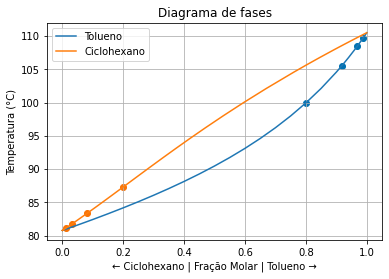

In [9]:
# Geração do gráfico apresentando as frações obtidas durante o cálculo iterativo

fig, ax = plt.subplots()

plt.scatter(f_t_list[0], Tt_list[0], color='#0072b2')
plt.scatter(f_t_list[1], Tt_list[1], color='#0072b2')
plt.scatter(f_t_list[2], Tt_list[2], color='#0072b2')
plt.scatter(f_t_list[3], Tt_list[3], color='#0072b2')

plt.scatter(f_c_list[0], Tc_list[0], color='#F97306')
plt.scatter(f_c_list[1], Tc_list[1], color='#F97306')
plt.scatter(f_c_list[2], Tc_list[2], color='#F97306')
plt.scatter(f_c_list[3], Tc_list[3], color='#F97306')

plt.plot(fracao_molar_tolueno, temperatura, label='Tolueno')
plt.plot(fracao_molar_ciclohexano, temperatura, label='Ciclohexano')
plt.xlabel('← Ciclohexano | Fração Molar | Tolueno →')
plt.legend()
plt.ylabel('Temperatura (°C)')
plt.title('Diagrama de fases')
plt.grid()
plt.show()

O Diagrama de fases acima apresenta o comportamente das misturas durante a separação. Verifica-se que durante o processo há uma tendência em ambos os compostos se aproximarem das extremidades, na qual a fração molar do tolueno atinge a taxa de aproximadamente 99% e o ciclohexano decresce para cerca de 1% na mistura.

### Cálculo do volume

O volume pode ser calculado pelo volume parcial do composto 1 ($\bar{v}_1$) multiplicado pelo seu número de mols ($n_1$) adicionado ao volume parcial do composto 2 ($\bar{v}_2$) multiplicado pelo seu número de mols ($n_1$):

$$\large \bar{v}_1 \times n_1 + \bar{v}_2 \times n_2$$

O volume por mol pode ser expresso ao dividir os termos pelo número de mols total da mistura, ou seja, ($n_1$ + $n_2$), obtendo:

$$\large \bar{v}_1 \times x_1 + \bar{v}_2 \times x_2$$

Em que $x_1 = \frac{n_1}{n_1+n_2}$ e $x_2 = \frac{n_2}{n_1+n_2}$

O volume por mol da mistura pode ser obtido ao considerar a densidade de uma mistura binária e $x_2 = 1 - x_1$, pois são grandezas complementares, da seguinte forma:

$$\large V (por mol)= \frac{x_1mw_1+(1-x_1)mw_2}{\rho mistura(x_1)}$$

Em que:

- $v$ é o volume da mistura por unidade molar
- $x_1$ é fração molar correspondente a um dos compostos
- $mw_i$ é a abreviação de *molecular weight* de cada composto
- $\rho$ é a densidade da mistura em relação ao composto $x_1$

#### A densidade da mistura foi obtida através de pesquisas na litetura
Dados experimentais, conforme SILVA el al (2009):

In [10]:
densidade_media = np.array([0.78795, 0.77870, 0.76920,  0.75965,  0.74990]).reshape(-1,1) # g/ml 
temperatura_K = np.array([283.15, 293.15, 303.15, 313.15, 323.15]).reshape(-1,1) # kelvin

Os dados do artigo fornecem a densidade média para o intervalo de temperatura, que convertido está entre 10 à 50 °C, não abrangendo o intervalo dos dados utilizados que compreende entre, aproximadamente, 80°C à 110°C que são correspondentes ao ponto de ebulição do ciclohexano e tolueno, respectivamente. Neste sentido, se faz necessário aplicar uma extrapolação aos dados do artigo por regressão linear, para obter o valor de densidade no intervalo em análise, ao aproximar pela reta, visto que o comportamento dos dados obtidos variam na medida que a temperatura da mistura tolueno e ciclohexano aumenta, a densidade média da mistura diminui, expressando uma reta decrescente.

Previsto:
A densidade_media prevista para a mistura a 383.8 k é: [[0.69234153]] g/ml


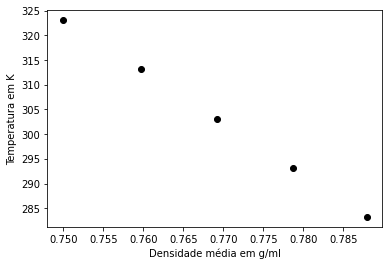

In [11]:
T_k = 383.8 # referente ao maior ponto de ebulição (tolueno)

# Cria o modelo linear
regressao = linear_model.LinearRegression()

# Treina o modelo com os dados de exemplo
regressao.fit(temperatura_K, densidade_media)

# Dados para previsão
temp_prev = np.array([T_k]).reshape(-1,1)

dens_prev = regressao.predict(temp_prev)
print('Previsto:')
print('A densidade_media prevista para a mistura a', T_k, 'k é:', dens_prev, 'g/ml')

# Dados usados no treinamento
plt.scatter(densidade_media, temperatura_K,  color='black')

plt.xlabel('Densidade média em g/ml')
plt.ylabel('Temperatura em K')

plt.show()

Cálculo do volume total da mistura de tolueno e ciclohexano a 110,65°C, com base na massa molecular de cada composto e a fração molecular inicialmente estabelecida, e considerando a relação

$$\large Volume = \frac{Massa}{Densidade}$$

In [12]:
# Dados sobre massa, densidade, número de mols, fração molar e volume

M_total = 1000 # kg/mol de massa para o sistema
f_t = 0.8 # fração molar do tolueno
f_c = 0.2 # fração molar do ciclohexano
M_t = M_total * f_t # massa do tolueno em kg/mol
M_c = M_total * f_c # massa do ciclohexano em kg/mol
Mm_t = 0.9214 # Massa molar do tolueno em kg/mol
Mm_c = 0.8416 # Massa molar do ciclohexano em kg/mol
rho_t = 0.8669 # Densidade do tolueno em g/ml
rho_c = 0.7781 # Densidade do ciclohexano em g/ml
n_t = M_t / Mm_t # número de mols do tolueno
n_c = M_c / Mm_c # número de mols do ciclohexano
x_t = n_t / (n_t + n_c) # fração molar tolueno pelo número de mols
x_c = n_c / (n_t + n_c) # fração molar ciclohexano pelo número de mols
v_t = Mm_t / rho_t # volume molar do tolueno em m³/mol
v_c = Mm_c / rho_c # volume molar do ciclohexano em m³/mol

V_mol = (v_t * x_t) + (v_c * x_c) # volume molar da mistura em ml/mol
V_total = (v_t * n_t) + (v_c * n_c) # volume total da mistura em L
V_final = ((x_t * n_t + (1 - x_t) * n_c) / dens_prev) # volume total da mistura, considerando a densidade em L

print('O volume por mol da mistura de tolueno e ciclohexano a', round(T_k-273.15, 2), '°C é aproximadamente:', float(np.round(V_mol/1000, decimals = 4)), 'ml/mol')
print('O volume total da mistura de tolueno e ciclohexano a', round(T_k-273.15, 2), '°C é aproximadamente:', float(np.round(V_total, decimals = 4)), 'L')
print('O volume total da mistura, considerando sua densidade, a', round(T_k-273.15, 2), '°C é aproximadamente:', float(np.round(V_final, decimals = 4)), 'L')

O volume por mol da mistura de tolueno e ciclohexano a 110.65 °C é aproximadamente: 0.0011 ml/mol
O volume total da mistura de tolueno e ciclohexano a 110.65 °C é aproximadamente: 1179.8648 L
O volume total da mistura, considerando sua densidade, a 110.65 °C é aproximadamente: 1058.343 L


O volume total a ser considerado para a mistura é de, aproximadamente, 1059 L para a temperatura de 110,65 °C, referente ao ponto de ebulição do tolueno, visto que a densidade obtida para essa temperatura é cerca de 0.69 g/ml. O critério para escolha da temperatura foi estabelecido a partir da densidade que é uma grandeza inversamente proporcional ao volume, ou seja, na medida que a densidade diminui, o volume aumenta e vice-versa. Pelos dados obtidos em pesquisa na literatura, foi observado que a densidade da mistura de tolueno e ciclohexano diminui com o aumento da temperatura, sendo assim, foi adotado o maior ponto de ebulição que é referente ao tolueno, extrapolando os dados conhecidos para encontrar a densidade em relação a esse ponto e, então, aplicar na equação do volume que considera a densidade prevista para a mistura.

### Destilação Fracionada:

- Fluxograma explicando o passo a passo do algoritmo

<img src = 'fluxograma do algoritmo.png'>

Para essa etapa foram aplicadas a equação de Clausius-Clapeyron para obter a pressão de vapor, dada uma variação de temperatura, e a Lei de Raoult para gerar os valores das frações molares respectivas as pressões obtidas, a fim de comparar com os dados anteriormente encontrados e determinar as pressões que não foram encontradas na literatura pesquisada.

O comportamento ideal de uma mistura binária é calculado a partir dos pontos de ebulição (pe) de seus componentes e o respectivo calor de vaporização (H - entalpia).

In [13]:
# Dados dos compostos Variáveis:
pe_ciclohexano = 353.9  # K
pe_tolueno = 383.8  # K
H_ciclohexano = 10346.8  # cal/mol
H_tolueno = 9076.14  # cal/mol

A equação de Clausius-Clapeyron fornece a seguinte relação quantitativa entre a pressão de vapor de uma substância ($p$) e a sua temperatura (T). Desta forma, é capaz de prever o aumento da pressão de vapor a cada unidade de temperatura que aumenta no sistema.

$$\large p=p^*e^{\frac{-\Delta H}{R}(\frac{1}{T} - \frac{1}{T^*})}$$

Em que:

$p$ → é a pressão de vapor (em torr)

$p^*$ → é a pressão de vapor do composto de referência (em torr)

$\Delta H$ → é o calor de vaporização (ou entalpia) do líquido (J/mol)

$R$ → é a constante universal dos gases (8,314 J/mol⋅K)

$T$ → é a temperatura de referência (Kelvin)

$T^*$ → é o ponto de ebulição normal a 1 atm (Kelvin)

In [14]:
def pressao_temperatura(h, t, p0, t0):
    
    '''Calcula a pressão de vapor de um líquido dada uma temperatura,
    usando a equação de Clausius-Clapeyron.
    
    As referências mais convenientes p0 e t0 são do ponto de ebulição do composto ciclohexano
    760 torr e 353.9 K.
    
    Parâmetros de entrada:
    
    h: O calor de vaporização em cal/mol
    t: A temperatura em K
    p0: Pressão de vapor de referência
    t0: Temperatura de referência em K

     Parâmetro de saída:
    
    A pressão de vapor na temperatura t.
    '''

    r = 1.987204  # conversão para cal/mol·K
    e = - (h/r) * ((1/t) - (1/t0))
    return p0 * math.exp(e)

In [15]:
def pressao_tolueno(t):
    
    '''Calcula a pressão de vapor (torr) do tolueno, dada uma temperatura em K.'''
    
    return pressao_temperatura(H_tolueno, t, 760, pe_tolueno)

def pressao_ciclohexano(t):
    
    '''Calcula a pressão de vapor (torr) do ciclohexano, dada uma temperatura em K.'''
    
    return pressao_temperatura(H_ciclohexano, t, 760, pe_ciclohexano)

Para um sistema em equilíbrio, a Lei de Raoult afirma que cada composto é dependente da pressão de vapor dos compostos individuais e da fração molar dos mesmos. A partir das pressões de vapor parciais $P_i$ de cada composto A e B, calculada pela pressão de vapor dos componentes puros $P^*_i$, multiplicada pela fração molar relativa $X_i$, e considerando que a pressão total do sistema é a soma das pressões parciais, é possível obter a respectiva fração molar de cada substância, ou seja,

$$P_A = X_A P^*_A$$

$$P_B = X_B P^*_B$$

Em que

$$X_A + X_b = 1$$ é a soma das frações que correspondem a 100% da concentração. Somando as pressões parciais e fazendo as devidas substituições, tem-se

$$P = P_A + P_B = X_A P^*_A + X_B P^*_B = X_A P^*_A + (1 - X_A) P^*_B = X_A P^*_A + P^*_B - X_A P^*_B$$

Então,

$$P = P^*_B + (P^*_A - P^*_B)  X_A$$

Logo, é possíve determinar a fração molar de $X_A$ e, por conseguinte, $X_B$

$$X_A = \frac{P-P^*_B}{P^*_A-P^*_B}$$

In [16]:
def fracao_ciclohexano_liquido(t):
    
    '''Calcula a fração molar de ciclohexano em uma mistura tolueno/ciclohexano,
    dada a pressão total da mistura com referência em 760 torr e as pressões parciais.
    '''
    
    p_ciclohexano = pressao_ciclohexano(t)
    p_tolueno = pressao_tolueno(t)
    return (760 - p_tolueno) / (p_ciclohexano - p_tolueno)

def fracao_tolueno_liquido(t):
    return 1.0 - fracao_ciclohexano_liquido(t)

A Lei de Raoult pode ser expressa como um somatório para cada composto do sistema para fornecer a pressão da mistura:

$$\large P_{mistura} = \sum_{i=1}^{N} P^*_A x_A^{líquido}$$

Para calcular a fase de vapor, é possível correlacionar com a fase líquida da seguinte forma,
$$\large X_A^{vapor} = \frac{P^*_A x_A^{líquido}}{P_{mistura}}$$

Ou seja, a fração molar de um composto na fase de vapor é determinada ao multiplicar a fração molar do composto na fase líquida pela pressão de vapor desse composto puro e, em seguida, dividir pela pressão de referência da mistura, estabelecida como 760 torr, equivalente a 1 atm, pois as substâncias não estão submetidas a variação de pressão, e sim a uma alteração da temperatura.

In [17]:
def fracao_tolueno_vapor(t):
    
    '''Calcula a fração molar do tolueno na fase de vapor a uma dada temperatura t em K.
    '''
    
    fracao_liquido = fracao_tolueno_liquido(t)
    p = pressao_tolueno(t)
    f_v = (fracao_liquido * p) / 760
    return f_v

In [18]:
# Cria um intervalo de coordenadas para a temperatura e converte para °C

t_k = np.arange(pe_ciclohexano, pe_tolueno, 0.01)  # K
t_c = t_k - 273.15  # °C

# Gera vetores da função X, e aplica em t_k para gerar as coordenadas x

f_liquido = np.vectorize(fracao_tolueno_liquido)
f_vapor = np.vectorize(fracao_tolueno_vapor)
fracao_liquido = f_liquido(t_k)
fracao_vapor = f_vapor(t_k)

#### Geração do diagrama de fases:

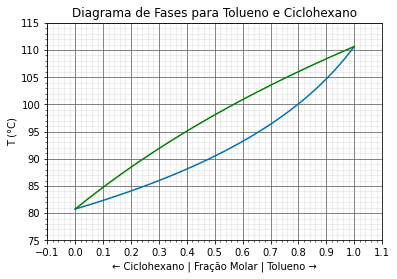

In [19]:
# Aplica a função do Matplotlib que permite plotar mais de um gráfico na mesma figura e descrever seu layout

fig, ax = plt.subplots()

# Definição do intervalo para as coordenadas x e y do gráfico

plt.xlim(-0.1, 1.1)
plt.ylim(75.0, 115.0)

# Atribuição dos valores para as coordenadas x (fração molar) e y (temperatura) de cada composto

curva_liquido = ax.plot(fracao_liquido, t_c, color='#0072b2')
curva_vapor = ax.plot(fracao_vapor, t_c, color='#008000')

ax.set(xlabel='← Ciclohexano | Fração Molar | Tolueno →', ylabel='T (°C)',
       title='Diagrama de Fases para Tolueno e Ciclohexano')

# Configuração do grid

ax.grid(b=True, which='major', color='#666666', linestyle='-')

ax.minorticks_on()
ax.xaxis.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2, markevery=0.02)
ax.yaxis.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

x_major_spacing = 0.1
x_minor_spacing = 0.02
ax.xaxis.set_minor_locator(ticker.MultipleLocator(x_minor_spacing))
ax.xaxis.set_major_locator(ticker.MultipleLocator(x_major_spacing))

plt.show()

# plt.savefig('Diagrama de fases Tolueno e Ciclohexano', dpi=300, orientation='landscape', transparent=False)

In [20]:
def temperaturas(fn, xi):
    
    '''Função para encontrar a temperatura em relação à fração molar, fn(t) = xi.
    
    Parâmetros de entrada:

    fn: função que recebe um argumento numérico
    xi: fração molar de um dado composto
    
    Parâmetro de saída:
    
    [t] : Temperatura em K. Deve ter apenas uma resposta
    '''
    
    funcao = lambda t: fn(t) - xi
    return fsolve(funcao, 353.15)

In [21]:
def prato_teorico(fracao_inicial):
    
    '''Retorna o pe de uma mistura em °C e sua composição de vapor,
    dada a composição do líquido.
    
    Parâmetro de entrada:
    
    fracao_inical: a fração molar de tolueno na mistura
    
    Parâmetro de saída:
    
    tupla de (T em °C, fração molar de tolueno em vapor)
    '''
    
    t = temperaturas(fracao_tolueno_liquido, fracao_inicial)
    fracao_vapor = fracao_tolueno_vapor(t)
    return t - 273.15, fracao_vapor

In [22]:
# Partindo de uma composição inicial de 0,8 mol de tolueno, calcula os dados t e x para o prato_teorico

x0 = 0.8
t0, x1 = prato_teorico(x0)
t1, x2 = prato_teorico(x1)
t2, x3 = prato_teorico(x2)
t3, x4 = prato_teorico(x3)
t4, x5 = prato_teorico(x4)
t5, x6 = prato_teorico(x5)
t6, x7 = prato_teorico(x6)
t7, x8 = prato_teorico(x7)
t8, x9 = prato_teorico(x8)
t9, x10 = prato_teorico(x9)
t10, x11 = prato_teorico(x10)
t11, x12 = prato_teorico(x11)

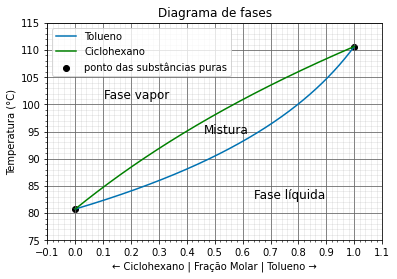

In [23]:
# Pontos dos compostos puros

fig, ax = plt.subplots()

ponto_ciclohexano = plt.scatter(0, pe_ciclohexano-273.15, 
                                   clip_on=False, color='#000000', label='ponto das substâncias puras')
ponto_tolueno = plt.scatter(1, pe_tolueno-273.15, 
                                  clip_on=False, color='#000000')

plt.xlim(-0.1, 1.1)
plt.ylim(75.0, 115.0)

curva_liquido = ax.plot(fracao_liquido, t_c, color='#0072b2', label='Tolueno')
curva_vapor = ax.plot(fracao_vapor, t_c, color='#008000', label='Ciclohexano')

ax.set(xlabel='← Ciclohexano | Fração Molar | Tolueno →', ylabel='T (°C)',
       title='Diagrama de Fases para Tolueno e Ciclohexano')

# Configuração do grid

ax.grid(b=True, which='major', color='#666666', linestyle='-')

ax.minorticks_on()
ax.xaxis.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2, markevery=0.02)
ax.yaxis.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

x_major_spacing = 0.1
x_minor_spacing = 0.02
ax.xaxis.set_minor_locator(ticker.MultipleLocator(x_minor_spacing))
ax.xaxis.set_major_locator(ticker.MultipleLocator(x_major_spacing))

# Configuração de anotações no gráfico

anotacao_fl = plt.annotate(
    'Fase líquida',
    xy=(1, pe_ciclohexano-273.15),
    xycoords='data',
    fontsize=12,
    xytext=(-100, 10),
    textcoords='offset points',)

anotacao_m = plt.annotate(
    'Mistura',
    xy=(1, pe_ciclohexano-273.15),
    xycoords='data',
    fontsize=12,
    xytext=(-150, 75),
    textcoords='offset points',)


anotacao_fv = plt.annotate(
    'Fase vapor',
    xy=(1, pe_ciclohexano-273.15),
    xycoords='data',
    fontsize=12,
    xytext=(-250, 110),
    textcoords='offset points',)

plt.xlabel('← Ciclohexano | Fração Molar | Tolueno →')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.title('Diagrama de fases')

plt.show()

c:\venv\ilumpy\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


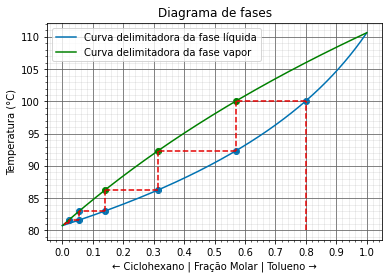

Fração destilada de tolueno a ser considerada: 0.9922
Fração destilada de ciclohexano a ser considerada: 0.0078


In [24]:
# Gera o gráfico com as linhas de fases em equilíbrio obtidas por pratos teóricos

fig, ax = plt.subplots()

# pontos ao longo das curvas de líquido e vapor que unem os segmentos de linha

l0 = plt.scatter([x0], [t0], color='#0072b2')
v0 = plt.scatter([x1], [t0], color='#008000')
l1 = plt.scatter([x1], [t1], color='#0072b2')
v1 = plt.scatter([x2], [t1], color='#008000')
l2 = plt.scatter([x2], [t2], color='#0072b2')
v2 = plt.scatter([x3], [t2], color='#008000')
l3 = plt.scatter([x3], [t3], color='#0072b2')
v3 = plt.scatter([x4], [t3], color='#0072b2')
v3 = plt.scatter([x4], [t4], color='#0072b2')
v3 = plt.scatter([x5], [t4], color='#0072b2')

curva_liquido = ax.plot(fracao_liquido, t_c, color='#0072b2', label='Curva delimitadora da fase líquida')
curva_vapor = ax.plot(fracao_vapor, t_c, color='#008000', label='Curva delimitadora da fase vapor')
plt.legend()

# Segmentos de linha dos pratos teóricos

vertical1 = plt.plot([x0, x0], [80, t0], color='#E50000', linestyle='--')
horizontal1 = plt.plot([x0, x1], [t0, t0], color='#E50000', linestyle='--')
vertical2 = plt.plot([x1, x1], [t0, t1], color='#E50000', linestyle='--')
horizontal2 = plt.plot([x1, x2], [t1, t1], color='#E50000', linestyle='--')
vertical3 = plt.plot([x2, x2], [t1, t2], color='#E50000', linestyle='--')
horizontal3 = plt.plot([x2, x3], [t2, t2], color='#E50000', linestyle='--')
vertical4 = plt.plot([x3, x3], [t2, t3], color='#E50000', linestyle='--')
horizontal4 = plt.plot([x3, x4], [t3, t3], color='#E50000', linestyle='--')
vertical5 = plt.plot([x4, x4], [t3, t4], color='#E50000', linestyle='--')
horizontal5 = plt.plot([x4, x5], [t4, t4], color='#E50000', linestyle='--')
vertical6 = plt.plot([x5, x5], [t4, t5], color='#E50000', linestyle='--')
horizontal6 = plt.plot([x5, x6], [t5, t5], color='#E50000', linestyle='--')
vertical7 = plt.plot([x6, x6], [t5, t6], color='#E50000', linestyle='--')

# Configuração do grid

plt.grid(b=True, which='major', color='#666666', linestyle='-')

ax.minorticks_on()
ax.xaxis.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2, markevery=0.02)
ax.yaxis.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

x_major_spacing = 0.1
x_minor_spacing = 0.02
ax.xaxis.set_minor_locator(ticker.MultipleLocator(x_minor_spacing))
ax.xaxis.set_major_locator(ticker.MultipleLocator(x_major_spacing))

plt.xlabel('← Ciclohexano | Fração Molar | Tolueno →')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.title('Diagrama de fases')

plt.show()

print("Fração destilada de tolueno a ser considerada:", round(1-x6, 4))
print("Fração destilada de ciclohexano a ser considerada:", round(x6, 4))

Como pode ser observado no gráfico acima, os pratos teóricos são cada um dos estágios em que os dois compostos estabelecem um equilíbrio entre as fases líquido e vapor (VLE), sendo representados horizontalmente pelas linhas de amarração entre a fase líquida (em azul) e a fase de vapor (em verde). O ponto de partida é a fração molar 0,8. Quando o tolueno atinge a temperatura de 100°C, permanecendo a temperatura constante nesse ponto, há uma transição de fase líquida para vapor e uma diminuição na fração molar líquida de 0,8 para 0,6 na fração molar de vapor. Considerando um sistema fechado, quando a temperatura abaixa de 100°C para aproximadamente 92°C, parte do composto retorna para o estado líquido e há uma nova transição de fase nessa da temperatura. A linha vertical é denominada isopleta e é traçada na posição correspondente à composição global do sistema, ou seja, expressa a razão entre o número de moles do componente na fase líquida e de vapor e o número total de moles de todos os componentes. O ciclo se repete até atingir o ponto das substâncias quase puras, quando ambas estão próximas dos pontos de união das curvas.

In [25]:
def temperaturas(fn, xi):
    
    '''Função para encontrar a temperatura em relação à fração molar, fn(t) = xi.
    
    Parâmetros de entrada:

    fn: função que recebe um argumento numérico
    xi: fração molar de um dado composto
    
    Parâmetro de saída:
    
    [t] : Temperatura em K. Deve ter apenas uma resposta
    '''
    
    funcao_teste = lambda t: fn(t) - xi
    return fsolve(funcao_teste, 363.15) # teste

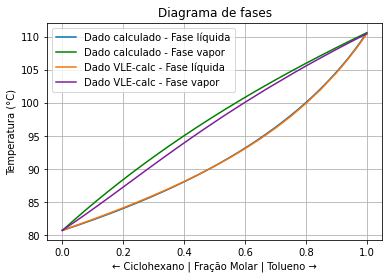

In [26]:
fig, ax = plt.subplots()

curva_liquido = ax.plot(fracao_liquido, t_c, color='#0072b2', label='Dado calculado - Fase líquida')
curva_vapor = ax.plot(fracao_vapor, t_c, color='#008000', label='Dado calculado - Fase vapor')
plt.plot(fracao_molar_tolueno, temperatura, label='Dado VLE-calc - Fase líquida', color='#F97306')
plt.plot(fracao_molar_ciclohexano, temperatura, label='Dado VLE-calc - Fase vapor', color='#7E1E9C')
plt.xlabel('← Ciclohexano | Fração Molar | Tolueno →')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.title('Diagrama de fases')
plt.grid()
plt.show()

Conforme constatado no diagrama, há uma variação entre os dados calculados neste algoritmo e os dados obtidos pelo site Vapor-Liquid Equilibrium Calculator, para a curva de vapor. Através deste link http://www.vle-calc.com/documentation.html é possível verificar a documentação detalhada do algoritmo utilizado na plataforma, bem como os bancos de dados utilizados. Porém, devido a não disponibilização do código para análise do seu funcionamento, bem como desconhecimento acerca dos valores utilizados para variáveis como a variação de entalpia, inviabilizando reproduzir os cálculos para assegurar que o resultado seja equivalente aos dados fornecidos, serão considerados os dados conforme calculado neste notebook.

Uma observação é que ambos os cálculos são teóricos, baseados em equações e em condições passíveis de serem previstas, ao contrário de estudos experimentais, onde podem ocorrer variações, em decorrência do meio ao qual as substâncias estão em interação.

#### Dados referêntes à pressão obtidos pelo site *Vapor-Liquid Equilibrium Calculator* apenas para análise do comportamento dos compostos quando submentidos à pressão

In [27]:
dados = pd.read_csv('Dados pressão Tolueno e Ciclohexano.txt', sep = ',', engine='python', header=0)
dados.head()

,Pressure,x1,y1
0,bar,mol fract.,NaN
1,0.986813,0,0.000000
2,0.986341,0.001,0.000522
3,0.986813,0,0.000000
4,0.986341,0.001,0.000522


In [28]:
pressao = dados.iloc[1:46, 0].astype(float)
fracao_molar_tolueno = dados.iloc[1:46, 1].astype(float)
fracao_molar_ciclohexano = dados.iloc[1:46, 2].astype(float)

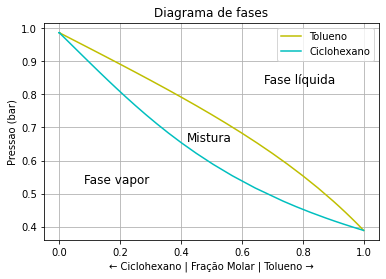

In [29]:
fig, ax = plt.subplots()

plt.plot(fracao_molar_tolueno, pressao, label='Tolueno', color='y')
plt.plot(fracao_molar_ciclohexano, pressao, label='Ciclohexano', color='c')

anotacao_fl = plt.annotate(
    'Fase vapor',
    xy=(1, 0.5),
    xycoords='data',
    fontsize=12,
    xytext=(-280, 10),
    textcoords='offset points',)

anotacao_m = plt.annotate(
    'Mistura',
    xy=(1, 0.43),
    xycoords='data',
    fontsize=12,
    xytext=(-177, 75),
    textcoords='offset points',)


anotacao_fv = plt.annotate(
    'Fase líquida',
    xy=(1, 0.5),
    xycoords='data',
    fontsize=12,
    xytext=(-100, 110),
    textcoords='offset points',)

plt.xlabel('← Ciclohexano | Fração Molar | Tolueno →')
plt.legend()
plt.ylabel('Pressao (bar)')
plt.title('Diagrama de fases')
plt.grid()
plt.show()

É perceptível que o comportamento medido ao variar a pressão é oposto ao observado para a temperatura, pois os compostos tendem a vaporizar com a diminuição da pressão e a liquefazer ao aumentar a pressão.

### Conclusão

Ao longo deste desafio, foi constatada a importância do entendimento acerca das variáveis que influenciam o comportamento das substâncias, como pressão e temperatura, e da aplicação da Leis de Raoult e a equação de Clausius-Clapeyron, que permitiram definir a pressão de vapor e determinar a separação fracionada da mistura binária, bem como a fração molar de cada composto ao fim do processo de separação. Além disso, também foi possível identificar o volume das substâncias, de acordo com a densidade da mistura, possibilitando calcular as dimensões mínimas do reservatório necessário para acondicionar a mistura. Para finalizar, o diagrama de fases aplicado é uma ferramenta fundamental para entender as proporções de fases em um sistema como o bifásico aqui estudado, e prever como as proporções variam à medida que as condições termodinâmicas são alteradas.

### Referências Bibliográficas:

ANTIC, Dean. **picoSpin™ 45/80: Simple Distillation of a Toluene-Cyclohexane Mixture**. Thermo Fisher Scientific, Boulder, CO, USA, 2014.

OLIVEIRA, Mário José de. **Termodinâmica**, Editora Livraria da Física, São Paulo, 2012, 2ed.

SILVA, Amanda A.; REIS, Rodrigo A.; PAREDES, Márcio L. L. **Density and Viscosity of Decalin, Cyclohexane, and Toluene Binary Mixtures at (283.15, 293.15, 303.15, 313.15, and 323.15) K**. Journal of Chemical & Engineering Data, v. 54, n. 7, p. 2067–2072, 2009.